## Cool Star Lab, UCSD   
## Joman, 14 July, 2022  
---

### imports 

In [1]:
import splat
from splat.plot import plotSpectrum



Welcome to the Spex Prism Library Analysis Toolkit (SPLAT)!
If you make use of any features of this toolkit for your research, please remember to cite the SPLAT paper:

Burgasser et al. (2017, Astro. Soc. India Conf. Series 14, p. 7); Bibcode: 2017ASInC..14....7B

If you make use of any spectra or models in this toolkit, please remember to cite the original source.
Please report any errors are feature requests to our github page, https://github.com/aburgasser/splat/




In [2]:
splat.VERSION

'2022.07.05'

In [282]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
import os
import os.path
from scipy import stats as scipy
from scipy import interpolate
import math

from astroquery.simbad import Simbad
from astroquery.vizier import Vizier
from astroquery.xmatch import XMatch

from astropy.io import fits
from astropy.io import ascii # we'll use this to upload files
import astropy.units as u # units
from astropy.coordinates import SkyCoord # astropy coordinate object
from astropy.table import Table

### Vars

In [4]:
PATH = os.getcwd()
TEMPLATE_NAMES = {}
TEMPLATE_SPECS = {}
TEMPLATE_DICT = {}

In [5]:
template_dir = PATH + '/Demeo_et_al_2009_Folder/fits'
class_names = np.array(sorted(f.split('.fits')[:-1][0] for f in os.listdir(template_dir) if f != '.ipynb_checkpoints'))
class_names  # array of strings

array(['Demeo_et_al_2009_A', 'Demeo_et_al_2009_B', 'Demeo_et_al_2009_C',
       'Demeo_et_al_2009_Cb', 'Demeo_et_al_2009_Cg',
       'Demeo_et_al_2009_Cgh', 'Demeo_et_al_2009_Ch',
       'Demeo_et_al_2009_D', 'Demeo_et_al_2009_K', 'Demeo_et_al_2009_L',
       'Demeo_et_al_2009_O', 'Demeo_et_al_2009_Q', 'Demeo_et_al_2009_R',
       'Demeo_et_al_2009_S', 'Demeo_et_al_2009_Sa', 'Demeo_et_al_2009_Sq',
       'Demeo_et_al_2009_Sr', 'Demeo_et_al_2009_Sv', 'Demeo_et_al_2009_T',
       'Demeo_et_al_2009_V', 'Demeo_et_al_2009_X', 'Demeo_et_al_2009_Xc',
       'Demeo_et_al_2009_Xe', 'Demeo_et_al_2009_Xk'], dtype='<U20')

### Functions

In [6]:
def saveTemplate(name:str, template_names:np.array):
    TEMPLATE_NAMES[name] = template_names
    temp = []
    for item in template_names:
        sp = splat.Spectrum(filename= template_dir + '/' + item + '.fits')
        temp.append(sp)
    TEMPLATE_SPECS[name] = temp
    TEMPLATE_DICT[name] = (template_names,temp)

In [7]:
def simpleClassify(spx, name):
    temp_list =[]
    for tp_spec in TEMPLATE_DICT.get(name)[1]:
        temp_list.append(splat.compareSpectra(spx, tp_spec))
    results = np.array(temp_list)
    index_of_best_fit = np.where(results[:,0] == results[:,0].min())
    return results, TEMPLATE_DICT.get(name)[0][index_of_best_fit]

___

In [8]:
saveTemplate('demeo',class_names)

In [9]:
TEMPLATE_NAMES, TEMPLATE_SPECS, TEMPLATE_DICT

({'demeo': array(['Demeo_et_al_2009_A', 'Demeo_et_al_2009_B', 'Demeo_et_al_2009_C',
         'Demeo_et_al_2009_Cb', 'Demeo_et_al_2009_Cg',
         'Demeo_et_al_2009_Cgh', 'Demeo_et_al_2009_Ch',
         'Demeo_et_al_2009_D', 'Demeo_et_al_2009_K', 'Demeo_et_al_2009_L',
         'Demeo_et_al_2009_O', 'Demeo_et_al_2009_Q', 'Demeo_et_al_2009_R',
         'Demeo_et_al_2009_S', 'Demeo_et_al_2009_Sa', 'Demeo_et_al_2009_Sq',
         'Demeo_et_al_2009_Sr', 'Demeo_et_al_2009_Sv', 'Demeo_et_al_2009_T',
         'Demeo_et_al_2009_V', 'Demeo_et_al_2009_X', 'Demeo_et_al_2009_Xc',
         'Demeo_et_al_2009_Xe', 'Demeo_et_al_2009_Xk'], dtype='<U20')},
 {'demeo': [ spectrum of Demeo_et_al_2009_A.fits,
    spectrum of Demeo_et_al_2009_B.fits,
    spectrum of Demeo_et_al_2009_C.fits,
    spectrum of Demeo_et_al_2009_Cb.fits,
    spectrum of Demeo_et_al_2009_Cg.fits,
    spectrum of Demeo_et_al_2009_Cgh.fits,
    spectrum of Demeo_et_al_2009_Ch.fits,
    spectrum of Demeo_et_al_2009_D.fits,
    spectru

In [158]:
test_spec = splat.Spectrum('D:\\PythonCodes\\JupyterWorkspace\\spex-prism_1036Ganymed_20010322.fits')

In [260]:
simpleClassify(test_spec, 'demeo')

(array([[9.64392029e+05, 3.41391735e-01],
        [1.53355999e+05, 5.66824795e-01],
        [9.83573354e+04, 4.93943905e-01],
        [8.79274959e+04, 4.76860784e-01],
        [8.04005662e+04, 4.88515827e-01],
        [5.87819326e+04, 4.73114373e-01],
        [6.04088579e+04, 4.95468831e-01],
        [2.74009155e+05, 3.28445051e-01],
        [6.99112777e+04, 4.54974993e-01],
        [4.64863520e+04, 4.07910517e-01],
        [2.73531554e+05, 5.64556664e-01],
        [1.15263923e+05, 5.03972924e-01],
        [1.99764553e+05, 4.19609387e-01],
        [5.54018952e+04, 4.12081543e-01],
        [4.56687163e+05, 4.23167529e-01],
        [1.04083538e+05, 4.39893344e-01],
        [6.33115992e+04, 4.21097744e-01],
        [5.48279460e+04, 3.78762793e-01],
        [1.01495191e+05, 3.88420357e-01],
        [3.16903344e+05, 4.11678680e-01],
        [1.08015527e+05, 4.18985979e-01],
        [6.47884316e+04, 4.52913281e-01],
        [6.01885168e+04, 4.38624989e-01],
        [7.13263014e+04, 4.3659150

#### Gross compare

In [252]:
objs_dir = 'D:\\PythonCodes/JupyterWorkspace/SpeX_asteroid_spectra'
obj_names = np.array(sorted(f.split('.fits')[:len(f.split('.'))-1][0] for f in os.listdir(objs_dir) if f != '.ipynb_checkpoints'))
obj_names  # array of strings

array(['spex-prism_1036Ganymed_20010322',
       'spex-prism_1036Ganymed_20010502',
       'spex-prism_110Lydia-1_20010502',
       'spex-prism_110Lydia-2-2_20010501',
       'spex-prism_110Lydia-2_20010501', 'spex-prism_110Lydia-2_20010502',
       'spex-prism_110Lydia-3_20010501', 'spex-prism_110Lydia-3_20010502',
       'spex-prism_110Lydia-4_20010502', 'spex-prism_110Lydia_20010501',
       'spex-prism_19356_20010501', 'spex-prism_1998SF36_20010322',
       'spex-prism_2000SS164_20010129', 'spex-prism_2000XG47_20010501',
       'spex-prism_201Penelope-1_20010502',
       'spex-prism_201Penelope-2_20010501',
       'spex-prism_201Penelope-2_20010502',
       'spex-prism_201Penelope-3-1_20010502',
       'spex-prism_201Penelope-3-2_20010502',
       'spex-prism_201Penelope-3_20010501',
       'spex-prism_201Penelope-4_20010501',
       'spex-prism_201Penelope-4_20010502',
       'spex-prism_201Penelope-5-2_20010502',
       'spex-prism_201Penelope-5.1_20010502',
       'spex-prism_20

In [278]:
d = {}
name_list = []
results_list = []

In [279]:
for item in obj_names:
    name_list.append(item)
    temp_spec = splat.Spectrum('D:\\PythonCodes\\JupyterWorkspace\\SpeX_asteroid_spectra/' + item +'.fits')
    results_list.append(simpleClassify(temp_spec, 'demeo')[1])

d['Objects'] = name_list
d['Simple Classifiy'] = results_list

In [287]:
demeo_results = ['S', 'S', 'Xk','Xk','Xk','Xk','Xk','Xk','Xk','Xk','Sq','--','--','--','Xk','Xk','Xk','Xk','Xk','Xk','Xk','Xk','Xk','Xk','Xk','Xk','Xk','Xe','Xe','Xe',
                '--', 'Xk','Xk','Xk','Xk','Xk','Xk','Xk','Xk','Xk','Xk','Sr','V','V','--', 'Sw','Sw','Sq','--','--','--','S','K','Sw','Xk','--']
d['Demeo Results'] = demeo_results

In [288]:
df = pd.DataFrame(data=d)
df

,Objects,Simple Classifiy,Demeo Results
0,spex-prism_1036Ganymed_20010322,[Demeo_et_al_2009_L],S
1,spex-prism_1036Ganymed_20010502,[Demeo_et_al_2009_Sv],S
2,spex-prism_110Lydia-1_20010502,[Demeo_et_al_2009_X],Xk
3,spex-prism_110Lydia-2-2_20010501,[Demeo_et_al_2009_X],Xk
4,spex-prism_110Lydia-2_20010501,[Demeo_et_al_2009_X],Xk
5,spex-prism_110Lydia-2_20010502,[Demeo_et_al_2009_Xk],Xk
6,spex-prism_110Lydia-3_20010501,[Demeo_et_al_2009_X],Xk
7,spex-prism_110Lydia-3_20010502,[Demeo_et_al_2009_Xk],Xk
8,spex-prism_110Lydia-4_20010502,[Demeo_et_al_2009_Xk],Xk
9,spex-prism_110Lydia_20010501,[Demeo_et_al_2009_T],Xk


___

From this small sample group, **10/47** spectra fits were categorized the same as published in Demeo 2009.  
simpleCompare often reach classifications of the same complex, but a different sub-class. (**20/47**)  
There also seems to be difficulty in classifying classes when slope is the main determiner. Classes of similar shape, but different depth/width of absorption even across complexes and when absoprtion features are lacking appear to have tricked simpleCompare.  
Correct and close $\rightarrow$ 30/47 = 63.8%    
Mistaken Identity $\rightarrow$ 17/47 = 36.2%


simpleCompare could be good, but not reliable and rigorous. 
___

#### PCA DATA PREP
Demeo:
- spline fits, 0.45 - 2.45 $\mu m$, fit increments of 0.05 $\mu m$ -> 41 pts
- Normalized at 0.55 $\mu m$, then "removed" slope (Demeo used divide, we later will test vs subtract)
- normalized data is then used to produce a linear regression line with slope $\gamma = \frac{\sum^i_0 (x_i - \bar{x})(y_i - \bar{y})}{\sum_0^i(x_i - \bar{x})^2}$, $x_i$ = wave value, $y_i$ = corresponding reflectance

Here:
- Normalized at 0.75 $\mu m$ instead, due to most data points begin at ~0.65, ~0.70 $\mu m$

In [147]:
testSpec = splat.Spectrum('D:\\PythonCodes\\JupyterWorkspace\\splat_projects/spex-prism_1036Ganymed_20010322.fits')

In [246]:
def spline_fit(spec):
    '''
    perform cubic spline interpolation, separating into 41 wave increments from 0.45 to 2.45 microns
    Goal is to reduce the influence of noise or missing points.
    '''
    
    # Removing the units
    x = spec.wave/u.micron
    y = spec.flux/u.erg*u.micron*u.s*u.cm**2
    
    tck = interpolate.splrep(x, y, s=0) # spline prep, parameters to plot the interpolation 
    
    xnew = np.arange(0.7, 2.6, 0.05) # separating the wavelengths into 0.05 micron increments, SpeX data seems ~0.65 - ~2.60
    ynew = interpolate.splev(xnew, tck, der=0) # using the spline prep, obtain the "best fit" reflectance values
    
    # plots the resulted spline best fit with the original
    plt.figure()
    plt.plot(x, y, xnew, ynew)
    plt.legend(['True','spline'])
    plt.title('Cubic-spline interpolation')
    plt.show()
    
    return (xnew, ynew, tck)

Side note, not all spectrrum data encompasses 0.45 - 2.45 microns.

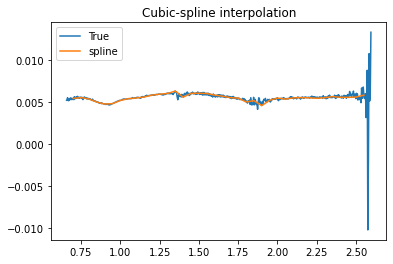

In [247]:
xx, yy, spline_vars = spline_fit(testSpec)

In [248]:
len(xx)

38

In [249]:
xx

array([0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  , 1.05, 1.1 , 1.15, 1.2 ,
       1.25, 1.3 , 1.35, 1.4 , 1.45, 1.5 , 1.55, 1.6 , 1.65, 1.7 , 1.75,
       1.8 , 1.85, 1.9 , 1.95, 2.  , 2.05, 2.1 , 2.15, 2.2 , 2.25, 2.3 ,
       2.35, 2.4 , 2.45, 2.5 , 2.55])

In [250]:
yy

array([0.00546372, 0.00556375, 0.00540418, 0.0050238 , 0.00479476,
       0.00483729, 0.00521953, 0.00542916, 0.0055098 , 0.00562401,
       0.00584919, 0.00597022, 0.00604727, 0.00633584, 0.00561326,
       0.0060665 , 0.00607712, 0.00604683, 0.00585828, 0.00572988,
       0.00554889, 0.00549596, 0.00504715, 0.00519646, 0.00460483,
       0.00524749, 0.00550387, 0.00538135, 0.00552421, 0.0055627 ,
       0.00553318, 0.00547776, 0.00554424, 0.00568681, 0.00559375,
       0.00558946, 0.00562535, 0.00585707])

In [264]:
def norm_splined(xx, yy, tck):
    '''
    Normalize the data at 0.75 micron wavelength, unlike Demeo 2009 our data does not contrain 0.55 micron wavelength,
    reflected in this change. But the slope obtained with linear regression later is not dependent on the wavelength 
    which data is normalized (according to Demeo, but we seem to see otherwise?).
    '''
    yy_val = interpolate.splev(np.array([0.75]), tck, der=0)
    yynew = yy/yy_val # now, 0.75 micron reflectance value = 1
    xxnew = xx
    return xxnew, yynew

In [258]:
def lin_regress(xxnew, yynew):
    '''
    Taking a linear regression line, slope of that data is calculated.
    '''
    nom = np.sum((xxnew - np.mean(xxnew))*(yynew - np.mean(yynew)))
    denom = np.sum((xxnew - np.mean(xxnew))**2)
    gamma = nom/denom
    return gamma

In [259]:
xxnew, yynew = norm_splined(xx, yy, spline_vars)

In [260]:
xxnew, yynew

(array([0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  , 1.05, 1.1 , 1.15, 1.2 ,
        1.25, 1.3 , 1.35, 1.4 , 1.45, 1.5 , 1.55, 1.6 , 1.65, 1.7 , 1.75,
        1.8 , 1.85, 1.9 , 1.95, 2.  , 2.05, 2.1 , 2.15, 2.2 , 2.25, 2.3 ,
        2.35, 2.4 , 2.45, 2.5 , 2.55]),
 array([0.98202164, 1.        , 0.97132023, 0.90295272, 0.86178565,
        0.8694298 , 0.9381327 , 0.97581052, 0.9903038 , 1.01083045,
        1.05130364, 1.07305709, 1.0869052 , 1.13877171, 1.00889973,
        1.09036262, 1.09227161, 1.08682638, 1.05293801, 1.02985906,
        0.9973293 , 0.98781613, 0.90714893, 0.93398507, 0.82764841,
        0.94315678, 0.98923729, 0.96721657, 0.99289396, 0.99981223,
        0.99450651, 0.98454483, 0.99649441, 1.02211877, 1.00539139,
        1.00462166, 1.01107211, 1.05272092]))

In [261]:
test_slope = lin_regress(xxnew, yynew)
test_slope

0.013259883748273166

In [386]:
regress_line = xxnew*test_slope + (1 - test_slope*0.75)

In [387]:
regress_line

array([0.99933701, 1.        , 1.00066299, 1.00132599, 1.00198898,
       1.00265198, 1.00331497, 1.00397797, 1.00464096, 1.00530395,
       1.00596695, 1.00662994, 1.00729294, 1.00795593, 1.00861892,
       1.00928192, 1.00994491, 1.01060791, 1.0112709 , 1.0119339 ,
       1.01259689, 1.01325988, 1.01392288, 1.01458587, 1.01524887,
       1.01591186, 1.01657485, 1.01723785, 1.01790084, 1.01856384,
       1.01922683, 1.01988983, 1.02055282, 1.02121581, 1.02187881,
       1.0225418 , 1.0232048 , 1.02386779])

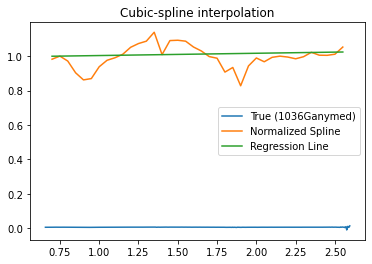

In [388]:
plt.figure()
plt.plot(x, y, xxnew, yynew, xxnew, regress_line) # the small details seems to be magnified in this case!
plt.legend(['True (1036Ganymed)','Normalized Spline', 'Regression Line'])
# plt.ylim([-0.010,0.010])
plt.title('Cubic-spline interpolation')
plt.show()

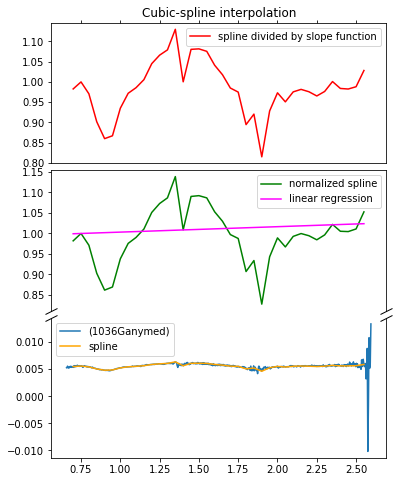

In [394]:
# into two portions - use the top (ax1) for the outliers, and the bottom
# (ax2) for the details of the majority of our data
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(6, 8), sharex=True)
fig.subplots_adjust(hspace=0.05)  # adjust space between axes

# plot the same data on both axes
ax2.plot(xxnew, yynew, color='green')
ax2.plot(xxnew, regress_line, c = 'magenta')
ax1.plot(xxnew, yynew/regress_line, c = 'red')
ax3.plot(x,y)
ax3.plot(xx, yy, c = 'orange')

ax1.set_title('Cubic-spline interpolation')
ax1.legend(['spline divided by slope function']) 
ax2.legend(['normalized spline','linear regression'])
ax3.legend([ '(1036Ganymed)','spline'])
# zoom-in / limit the view to different portions of the data
# ax2.set_ylim(.78, 1.2)  # outliers only
# ax3.set_ylim(-0.002, 0.012)  # most of the data

# hide the spines between ax and ax2
# ax1.spines['bottom'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
# ax2.spines['top'].set_visible(False)
ax3.spines['top'].set_visible(False)
ax1.xaxis.tick_top()
ax2.xaxis.set_visible(False)
ax1.tick_params(labeltop=False)  # don't put tick labels at the top
ax3.xaxis.tick_bottom()

# Now, let's turn towards the cut-out slanted lines.
# We create line objects in axes coordinates, in which (0,0), (0,1),
# (1,0), and (1,1) are the four corners of the axes.
# The slanted lines themselves are markers at those locations, such that the
# lines keep their angle and position, independent of the axes size or scale
# Finally, we need to disable clipping.

d = .5  # proportion of vertical to horizontal extent of the slanted line
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)
# ax1.plot([0, 1], [0, 0], transform=ax1.transAxes, **kwargs)
# ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)
ax2.plot([0, 1], [0, 0], transform=ax2.transAxes, **kwargs)
ax3.plot([0, 1], [1, 1], transform=ax3.transAxes, **kwargs)


plt.show()
fig.savefig('demeo_data_prep_divide_slope.png')

In [82]:
x = testSpec.wave/u.micron
y = testSpec.flux/u.erg*u.micron*u.s*u.cm**2
x,y

(<Quantity [0.657854  , 0.6599637 , 0.6620699 , 0.6641733 , 0.6662748 ,
            0.668375  , 0.67047465, 0.6725745 , 0.6746753 , 0.67677754,
            0.67888206, 0.68098944, 0.6831003 , 0.6852152 , 0.68733484,
            0.68945974, 0.69159055, 0.69372773, 0.69587183, 0.69802344,
            0.7001831 , 0.7023512 , 0.7045283 , 0.7067148 , 0.7089113 ,
            0.7111181 , 0.71333575, 0.71556455, 0.717805  , 0.72005755,
            0.72232246, 0.72460014, 0.726891  , 0.7291953 , 0.73151344,
            0.7338458 , 0.7361925 , 0.73855406, 0.7409307 , 0.7433227 ,
            0.7457302 , 0.7481536 , 0.75059325, 0.75304914, 0.75552166,
            0.75801104, 0.76051736, 0.76304096, 0.76558197, 0.7681405 ,
            0.77071685, 0.7733111 , 0.77592343, 0.778554  , 0.7812029 ,
            0.7838703 , 0.7865563 , 0.789261  , 0.7919845 , 0.7947269 ,
            0.7974883 , 0.80026877, 0.80306834, 0.80588716, 0.8087252 ,
            0.81158257, 0.81445926, 0.81735533, 0.8202708 , 0.82

In [83]:
tck = interpolate.splrep(x, y, s=0)

In [84]:
tck

(array([0.65785402, 0.65785402, 0.65785402, 0.65785402, 0.66206992,
        0.66417331, 0.66627479, 0.66837502, 0.67047465, 0.67257452,
        0.67467529, 0.67677754, 0.67888206, 0.68098944, 0.68310028,
        0.68521518, 0.68733484, 0.68945974, 0.69159055, 0.69372773,
        0.69587183, 0.69802344, 0.70018309, 0.70235121, 0.70452827,
        0.70671481, 0.7089113 , 0.7111181 , 0.71333575, 0.71556455,
        0.71780503, 0.72005755, 0.72232246, 0.72460014, 0.72689098,
        0.7291953 , 0.73151344, 0.73384577, 0.73619252, 0.73855406,
        0.74093068, 0.74332267, 0.74573022, 0.74815363, 0.75059325,
        0.75304914, 0.75552166, 0.75801104, 0.76051736, 0.76304096,
        0.76558197, 0.76814049, 0.77071685, 0.77331108, 0.77592343,
        0.77855402, 0.78120291, 0.78387028, 0.7865563 , 0.78926098,
        0.7919845 , 0.79472691, 0.79748827, 0.80026877, 0.80306834,
        0.80588716, 0.80872518, 0.81158257, 0.81445926, 0.81735533,
        0.82027078, 0.82320571, 0.82616001, 0.82

In [89]:
np.arange?

Docstring:
arange([start,] stop[, step,], dtype=None, *, like=None)

Return evenly spaced values within a given interval.

Values are generated within the half-open interval ``[start, stop)``
(in other words, the interval including `start` but excluding `stop`).
For integer arguments the function is equivalent to the Python built-in
`range` function, but returns an ndarray rather than a list.

When using a non-integer step, such as 0.1, the results will often not
be consistent.  It is better to use `numpy.linspace` for these cases.

Parameters
----------
start : integer or real, optional
    Start of interval.  The interval includes this value.  The default
    start value is 0.
stop : integer or real
    End of interval.  The interval does not include this value, except
    in some cases where `step` is not an integer and floating point
    round-off affects the length of `out`.
step : integer or real, optional
    Spacing between values.  For any output `out`, this is the distance
  

In [97]:
xnew = np.arange(x[0], x[-1], (x[-1]-x[0])/41) # this version always divide into 41 increments, but may not be 0.05 micron increments
ynew = interpolate.splev(xnew, tck, der=0)

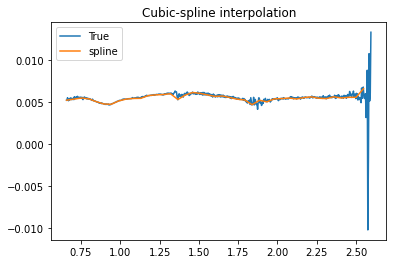

In [104]:
plt.figure()
plt.plot(x, y, xnew, ynew)
plt.legend(['True','spline'])
plt.title('Cubic-spline interpolation')
plt.show()

In [102]:
xnew, ynew

(array([0.65785402, 0.70508528, 0.75231653, 0.79954779, 0.84677904,
        0.8940103 , 0.94124155, 0.98847281, 1.03570406, 1.08293532,
        1.13016658, 1.17739783, 1.22462909, 1.27186034, 1.3190916 ,
        1.36632285, 1.41355411, 1.46078536, 1.50801662, 1.55524788,
        1.60247913, 1.64971039, 1.69694164, 1.7441729 , 1.79140415,
        1.83863541, 1.88586666, 1.93309792, 1.98032917, 2.02756043,
        2.07479169, 2.12202294, 2.1692542 , 2.21648545, 2.26371671,
        2.31094796, 2.35817922, 2.40541047, 2.45264173, 2.49987299,
        2.54710424]),
 array([0.00525145, 0.00538114, 0.00550934, 0.0054164 , 0.00507717,
        0.00480621, 0.00476074, 0.00515601, 0.00537721, 0.00545983,
        0.00547265, 0.00579749, 0.00588357, 0.00592397, 0.00602038,
        0.00533357, 0.00587046, 0.00616806, 0.00606191, 0.00587892,
        0.00570396, 0.00575155, 0.00556683, 0.00537172, 0.00527666,
        0.00472215, 0.00523711, 0.00505889, 0.00541432, 0.00544098,
        0.0055072 , 0.0053

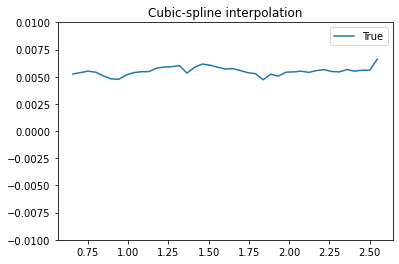

In [103]:
plt.figure()
plt.plot(xnew, ynew)
plt.legend(['True'])
plt.title('Cubic-spline interpolation')
plt.ylim([-0.010,0.010])
plt.show()

In [74]:
TEMPLATE_SPECS.get('demeo')[1].fluxMax()

<Quantity 1.004 erg / (cm2 micron s)>

In [61]:
plt.plot?

Signature: plt.plot(*args, scalex=True, scaley=True, data=None, **kwargs)
Docstring:
Plot y versus x as lines and/or markers.

Call signatures::

    plot([x], y, [fmt], *, data=None, **kwargs)
    plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)

The coordinates of the points or line nodes are given by *x*, *y*.

The optional parameter *fmt* is a convenient way for defining basic
formatting like color, marker and linestyle. It's a shortcut string
notation described in the *Notes* section below.

>>> plot(x, y)        # plot x and y using default line style and color
>>> plot(x, y, 'bo')  # plot x and y using blue circle markers
>>> plot(y)           # plot y using x as index array 0..N-1
>>> plot(y, 'r+')     # ditto, but with red plusses

You can use `.Line2D` properties as keyword arguments for more
control on the appearance. Line properties and *fmt* can be mixed.
The following two calls yield identical results:

>>> plot(x, y, 'go--', linewidth=2, markersize=12)
>>> plot(x, y,

In [58]:
np.arange?

Docstring:
arange([start,] stop[, step,], dtype=None, *, like=None)

Return evenly spaced values within a given interval.

Values are generated within the half-open interval ``[start, stop)``
(in other words, the interval including `start` but excluding `stop`).
For integer arguments the function is equivalent to the Python built-in
`range` function, but returns an ndarray rather than a list.

When using a non-integer step, such as 0.1, the results will often not
be consistent.  It is better to use `numpy.linspace` for these cases.

Parameters
----------
start : integer or real, optional
    Start of interval.  The interval includes this value.  The default
    start value is 0.
stop : integer or real
    End of interval.  The interval does not include this value, except
    in some cases where `step` is not an integer and floating point
    round-off affects the length of `out`.
step : integer or real, optional
    Spacing between values.  For any output `out`, this is the distance
  

### IR only, as an "an intermediate tool to indicate classes"

For **C** and **X** in IR, we expect to see these two types occupy the same space in PCA as distinguishing features are in the visible range.    
Author notes "**L-type** objects may be mixed in with our definition of **Sv- and R-types** because they do not fully separate in all cases."    
**Cg, Cgh, Xc, Xe**, and **Xk** objects requires visible wavelength   
That leaves us with **D, K, L, O, Q, R, S, Sa, Sq, Sr, Sv, T, V**

End members: D, K, L, T, A, O, Q, R V
In Demeo 2009, the team began with End Members first.

#### S Complex - example 1036Ganymed (S), simpleClassify => L
Appear to coincide with Demeo's observation   
J: dip near 1 micron could be key to ID S complexes vs some End Members  
Careful as S complex appear similar in IR  
Slope could become distinguishing factor (e.g. Sa and S share similar absorption features, but Sa has greater slope in 1-1.5 $\mu m$).  
*Consider removing noisy region > 2.50 $\mu m$, may help?* --> still categorized as L

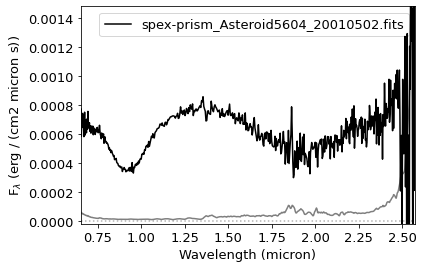

[<Figure size 432x288 with 1 Axes>]

<Figure size 432x288 with 0 Axes>

In [141]:
spS = splat.Spectrum('D:\\PythonCodes\\JupyterWorkspace\\splat_projects/spex-prism_Asteroid5604_20010502.fits')
spS.wave
spS.plot()

In [142]:
spS.wave

<Quantity [0.6504015 , 0.6525299 , 0.65465194, 0.65676844, 0.6588803 ,
           0.66098815, 0.6630929 , 0.6651953 , 0.66729605, 0.6693959 ,
           0.6714956 , 0.6735958 , 0.6756972 , 0.6778005 , 0.6799063 ,
           0.68201524, 0.68412805, 0.68624514, 0.6883673 , 0.690495  ,
           0.6926288 , 0.6947693 , 0.69691706, 0.6990725 , 0.7012361 ,
           0.7034086 , 0.7055902 , 0.7077815 , 0.70998293, 0.712195  ,
           0.714418  , 0.71665245, 0.7188987 , 0.7211572 , 0.7234283 ,
           0.7257123 , 0.72800964, 0.7303207 , 0.7326457 , 0.734985  ,
           0.7373389 , 0.7397077 , 0.7420918 , 0.7444913 , 0.7469065 ,
           0.7493378 , 0.7517853 , 0.7542493 , 0.7567299 , 0.7592275 ,
           0.76174223, 0.76427424, 0.76682377, 0.76939094, 0.771976  ,
           0.774579  , 0.77720016, 0.77983963, 0.7824975 , 0.78517395,
           0.787869  , 0.79058284, 0.79331553, 0.7960671 , 0.7988378 ,
           0.8016276 , 0.8044365 , 0.8072646 , 0.81011206, 0.81297886,
      

In [245]:
splat.Spectrum.trim?

Signature: splat.Spectrum.trim(self, rng, **kwargs)
Docstring:
:Purpose: 
    Trims a spectrum to be within a certain wavelength range or set of ranges. 
    Data outside of these ranges are excised from the wave, flux and noise arrays. 
    The full spectrum can be restored with the reset() procedure.

:Required Inputs: 

    :param range: the range(s) over which the spectrum is retained - a series of nested 2-element arrays

:Optional Inputs: 

    None

:Example:
   >>> import splat
   >>> sp = splat.getSpectrum(lucky=True)[0]
   >>> sp.smoothfluxMax()
   <Quantity 1.0577336634332284e-14 erg / (cm2 micron s)>
   >>> sp.computeSN()
   124.5198
   >>> sp.scale(1.e15)
   >>> sp.fluxMax()
   <Quantity 1.0577336549758911 erg / (cm2 micron s)>
   >>> sp.computeSN()
   124.51981
File:      d:\pythoncodes\splat\splat\core.py
Type:      function


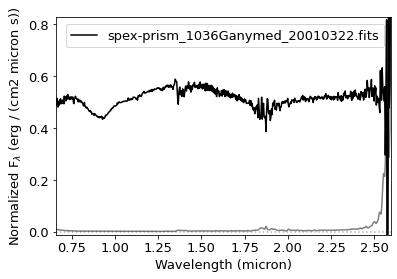

[<Figure size 432x288 with 1 Axes>]

<Figure size 432x288 with 0 Axes>

In [222]:
spS_copy = spS
spS_copy.normalize()
spS_copy.plot()

In [225]:
troubleShoot = fits.open('D:\\PythonCodes\\JupyterWorkspace\\spex-prism_1036Ganymed_20010322.fits')

In [232]:
tblshoot = fits.getdata('D:\\PythonCodes\\JupyterWorkspace\\spex-prism_1036Ganymed_20010322.fits')

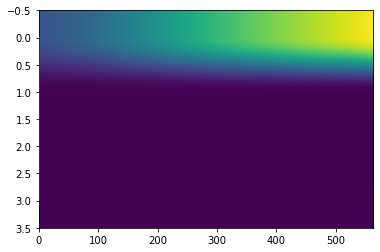

In [244]:
plt.imshow(tblshoot, aspect='auto')

In [249]:
spS_copy.trim([0.6,2.5])

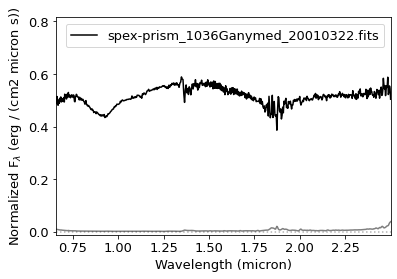

[<Figure size 432x288 with 1 Axes>]

<Figure size 432x288 with 0 Axes>

In [250]:
spS_copy.plot()

In [289]:
simpleClassify(spS_copy, 'demeo')[1]

array(['Demeo_et_al_2009_L'], dtype='<U20')

In [312]:
f1wave, f1flux, f1sig, f1avg = np.transpose(np.genfromtxt('D:\\PythonCodes\\JupyterWorkspace\\MITHNEOS_data/sp291/a022099.sp291.txt'))

In [304]:
# sp3 = splat.Spectrum('D:\\PythonCodes\\JupyterWorkspace\\MITHNEOS_data/sp291/a022099.sp291.txt')

Attempting PCA below 
1) map different data on properties/variables as points
    - First principal axis (PA) $\rightarrow$ max(variance)
    - 2nd PA $\rightarrow$ $PA_2 \perp PA_1$
   
in paper, helpful to see decision tree in apx B.

##### Old Functions
---

In [ ]:
#############
# functions #
#############

def saveTemplate(directory: str, saveName: str, classNames): #need revision, update: 'one step' is working
#     if not delim: #defaults separation to one space
#         delim = ' '
    
    saveFolderName = saveName + '_Folder'
    
    #check if save location already existed (e.g. from previous calls)
    if os.path.isdir(saveFolderName) == False: os.makedirs(saveFolderName)
    if os.path.isdir(saveFolderName+'\\csv') == False: 
        os.makedirs(saveFolderName+'\\csv')
        os.makedirs(saveFolderName+'\\fits')
    
    temp = pd.read_csv(directory, sep=' ', header=None, index_col=0) #uses col 0 for index
    temp.index.name = 'Wave' #dataframe with colomns Wave, and 2 other unnamed colomns
    n = 0
    tempDict ={}
    for j in classNames:
        tempDict[j] = temp.iloc[:,[n, n+1]].rename(columns={n+1: 'Flux', n+2: 'Noise'})#.index.names = ['wave']
        tempDict.get(j).to_csv(path_or_buf = saveFolderName+'\\csv\\' + saveName + '_' + j + '.csv' ,sep=',')
        print(type(tempDict.get(j)))
        splat.Spectrum(saveFolderName+'\\csv\\'+saveName+'_'+j+'.csv').save(saveFolderName+'\\fits\\'+saveName+'_'+j+'.fits')  
        n += 2


def slopeless(inSpec: splat.Spectrum, slope = 0):
    x = inSpec.wave.value
    y = inSpec.flux.value
    dy = inSpec.noise.value
    
    m,b = np.polyfit(x,y, 1) # returns m, b in y = mx + b, then use this with each value of fpx.wave as x to calculate line
    
    fitArray = np.empty_like(y, dtype=float)
    n = 0
    for val in x:
        fitArray[n] = m*val+b
        n+=1

    tDict = {}
    tDict['wave'] = x
    tDict['flux'] = np.divide(y, fitArray)
    tDict['noise'] = np.divide(dy, fitArray)
    outSpec = splat.Spectrum(tDict)
    outSpec.name =  inSpec.name + '_Slopeless'
    
    return outSpec

    
def classifyAsteroid(sp1, scheme, *output, slope=True, folder=False, **kwargs):
    """
    :Purpose: 
    
        Categorize input spectra to a specific available classification scheme.
    
    :Required Inputs:
    
        :Param sp1: a single splat.Spectrum
        :Param scheme: a dictionary of template spectra from that scheme
        
    :Optional Inputs:
        
        :Param showAll: boolean, True: shows the fit scores for all the templates.
        :Param plot: boolean, True (default): shows plot of sp1 vs the best template fit determined.
        :Param save: boolean, True: saves comparison plot as <sp1 name>_<scheme name>_<class name>.pdf #yet to be implemented
        :Param slope: boolean, True(default): slope=False to remove slope during comparison.
        
    :Output:
        
        Name of the spectral class and the corresponding fit score.
        
    """
    if(kwargs.get('plot') == None):
        kwargs['plot'] = True
    
    fitScores = {}
    ranges = [0.85, 2.45]

    if(slope == False):
        slopelessScheme = {}
        for key, template in scheme.items():
            slopelessScheme[key] = slopeless(template)
        sp1 = slopeless(sp1)
        scheme = slopelessScheme
        
    for key, template in scheme.items():
            fitScores[key] = splat.compareSpectra(sp1, template, fit_ranges=ranges, mask_telluric=True, novar2=True)[0]
    
    bestFitName = min(fitScores, key=fitScores.get)
    
#     if(kwargs.get('plot') and slope==False):
#         splat.compareSpectra(sp1, scheme.get(bestFitName), fit_ranges=ranges, mask_telluric=True, plot=True, novar2=True)
#     # elif(kwargs.get('save')):
    
    if(kwargs.get('plot')):
        splat.compareSpectra(sp1, scheme.get(bestFitName), fit_ranges=ranges, mask_telluric=True, novar2=True, plot=True)

    if(kwargs.get('showAll')):
        return bestFitName, fitScores.get(bestFitName), fitScores
    else:
        return bestFitName, fitScores.get(bestFitName)
